In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import h5py
import sys

/uufs/astro.utah.edu/common/home/u1371365/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
allStarPath = '/uufs/chpc.utah.edu/common/home/sdss/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allStar-dr17-synspec_rev1.fits'
allStar = Table(fits.open(allStarPath)[1].data)

In [3]:
allVisitPath = '/uufs/chpc.utah.edu/common/home/sdss/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allVisit-dr17-synspec_rev1.fits' 
allVisit = Table(fits.open(allVisitPath)[1].data)

In [4]:
def get_wavs():
    CRVAL1 = 4.17825
    CDELT1 = 6e-06
    LEN = 8700
    wavs = np.power(10, CRVAL1 + CDELT1 * np.arange(LEN))
    return wavs

mwavs = get_wavs() # same as apstar wavelength grid from [125:]

In [166]:
path_apMADGICS = '/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/mwm/sandbox/apMADGICS/'
vers0 = 'v2023_06_06/'
vers1 = 'v2023_07_24/'
vers2 = 'v2024_03_16/'
# vers2 = vers0
idx_file = 'map2star_1indx'
idx_visit_file = 'map2visit_1indx'
outputsdir = 'outdir_wu/'
outputsdir_th = 'outdir_wu_th/'
outputsdir_dd = 'outdir_wu_dd/'

# MADGICS README vers1 /uufs/chpc.utah.edu/common/home/sdss50/sdsswork/mwm/sandbox/apMADGICS/v2023_07_24/README.txt

def getoutputsdata(name, idx, version = vers0):
    if (version == vers0): 
        outputs = outputsdir
    elif (version == vers1):
        outputs = outputsdir_th
    elif (version == vers2):
        outputs = outputsdir_dd
    with h5py.File(path_apMADGICS + version + outputs + 'apMADGICS_out_' + name + '.h5') as f:
        return f[name][idx]
    
with h5py.File(path_apMADGICS + vers2 + idx_file + '.h5') as f:
    idx2 = np.array(f[idx_file]) - 1
    # idx0 is the index of 

with h5py.File(path_apMADGICS + vers2 + idx_visit_file + '.h5') as f:
    idx2_visit = np.array(f[idx_visit_file]) - 1

/scratch/local/u1371365/1016018/ipykernel_1804554/4127964940.py:25: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  idx2 = np.array(f[idx_file]) - 1
/scratch/local/u1371365/1016018/ipykernel_1804554/4127964940.py:29: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  idx2_visit = np.array(f[idx_visit_file]) - 1


In [205]:
# star_apogee_id = 'AP01340801+3038380' # GC
star_apogee_id = 'AP00424435+4116088' # M31
star_idx = np.where(allStar['APOGEE_ID'] == star_apogee_id)[0]
visit_idx = np.where(allVisit['APOGEE_ID'] == star_apogee_id)[0]

star_to_madgics = np.where(star_idx == idx2)[0]
visit_to_madgics = np.where(visit_idx[1] == idx2_visit)[0]

In [213]:
# match_idx_visit = visit_idx[0] #GOES TO THE ALL VISIT FILE
visit = allVisit[visit_idx]
visit

APOGEE_ID,TARGET_ID,VISIT_ID,FILE,FIBERID,CARTID,PLATE,MJD,TELESCOPE,SURVEY,FIELD,PROGRAMNAME,ALT_ID,LOCATION_ID,RA,DEC,GLON,GLAT,RELFLUX,MTPFLUX,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SNR,STARFLAG,STARFLAGS,DATEOBS,JD,VLSR,VGSR,CHISQ,SYNTHFILE,MIN_H,MAX_H,MIN_JK,MAX_JK,VREL,VRELERR,VHELIO,BC,RV_TEFF,RV_LOGG,RV_FEH,RV_CARB,RV_ALPHA,XCORR_VREL,XCORR_VRELERR,XCORR_VHELIO,CCFWHM,AUTOFWHM,RV_CHI2,N_COMPONENTS,RV_COMPONENTS,RV_FLAG
str23,str23,str64,str45,int16,int16,str16,int32,str6,str14,str19,str18,str47,int16,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,str15,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,str20,float32,str17,float32,float32,int32,int32,int32,int32,int32,int32,str192,float32,int64,str132,str23,float64,float32,float32,float32,str18,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,int32,float32[3],int32
AP00424435+4116088,AP00424435+4116088,apogee.apo25m.dr17.11619.58745.183,apVisit-dr17-11619-58745-183.fits,183,8,11619,58745,apo25m,apogee2-manga,ANDR3,anc,JAP00424435+4116086,5478,10.6848,41.2691,121.17439138718817,-21.572846602795607,0.798725,0.969142,-9999.99,-9999.99,10.62,-9999.99,-9999.99,-9999.99,2MASS_imaging,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-1,1,-9999.99,-9999.99,none,-9999.99,none,-9999.99,-9999.99,0,0,0,0,-1073741568,0,"APOGEE2_ANCILLARY,APOGEE2_M31",146.485,131072,SUSPECT_BROAD_LINES,2019-09-19T08:05:45.884,2458745.86052,999999.0,999999.0,0.0,,-9999.99,9999.99,-9999.99,9999.99,999.9999999999999,1.4695195266945618,1012.7459192276,12.745919227600098,39999.99999999892,3.6137173069599826,0.13286623425700284,nan,nan,1000.0,5.3666034,1012.7459,535.93726,816.2053,3.545195,0,0.0 .. 0.0,0
AP00424435+4116088,AP00424435+4116088,apogee.apo25m.dr17.11619.58802.232,apVisit-dr17-11619-58802-232.fits,232,1,11619,58802,apo25m,apogee2-manga,ANDR3,anc,JAP00424435+4116086,5478,10.6848,41.2691,121.17439138718817,-21.572846602795607,0.926987,1.0,-9999.99,-9999.99,10.62,-9999.99,-9999.99,-9999.99,2MASS_imaging,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-1,1,-9999.99,-9999.99,none,-9999.99,none,-9999.99,-9999.99,0,0,0,0,-1073741568,0,"APOGEE2_ANCILLARY,APOGEE2_M31",194.783,131072,SUSPECT_BROAD_LINES,2019-11-15T05:05:47.288,2458802.73554,999999.0,999999.0,0.0,,-9999.99,9999.99,-9999.99,9999.99,999.9999999999999,1.081066372193315,989.219980239868,-10.780019760131836,39999.99999999892,3.6137173069599826,0.13286623425700284,nan,nan,1000.0,6.3977995,989.22,604.41614,816.0739,4.6096144,0,0.0 .. 0.0,0
AP00424435+4116088,AP00424435+4116088,apogee.apo25m.dr17.11619.58793.286,apVisit-dr17-11619-58793-286.fits,286,7,11619,58793,apo25m,apogee2-manga,ANDR3,anc,JAP00424435+4116086,5478,10.6848,41.2691,121.17439138718817,-21.572846602795607,0.865969,0.932012,-9999.99,-9999.99,10.62,-9999.99,-9999.99,-9999.99,2MASS_imaging,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-1,1,-9999.99,-9999.99,none,-9999.99,none,-9999.99,-9999.99,0,0,0,0,-1073741568,0,"APOGEE2_ANCILLARY,APOGEE2_M31",238.88,131072,SUSPECT_BROAD_LINES,2019-11-06T03:51:16.838,2

In [216]:
match_idx = visit_to_madgics[0] # chooose first visit
flux = getoutputsdata('flux', match_idx, version = vers2)
fluxerr = getoutputsdata('fluxerr2', match_idx, version = vers2)
skylines = getoutputsdata('x_skyLines_faint_v0', match_idx, version = vers2)
skycont = getoutputsdata('x_skyContinuum_v0', match_idx, version = vers2)
starcont = getoutputsdata('x_starContinuum_v0', match_idx, version = vers2)
starlines = getoutputsdata('x_starLines_v0', match_idx, version = vers2)
dib = getoutputsdata('x_dib_v1_1_15273', match_idx, version = vers2)
rv = getoutputsdata('RV_pixoff_final', match_idx, version = vers2)

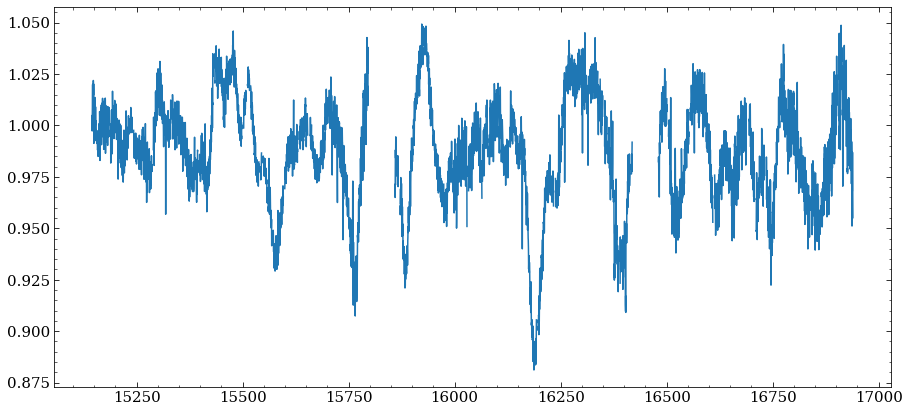

In [215]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(mwavs, (flux-skylines - skycont) / (starcont))
plt.show()

In [220]:
rv_km_s = 3e5 * (np.power(10, 6e-6 * rv) - 1)
print(rv_km_s)

-167.75575743406267
